## KNN - K Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('water_potability_AdityaKadiwal.csv')

In [3]:
# remove_null = df.dropna()
fillWithMean = df.apply(lambda col: col.fillna(col.mean()), axis=0)
# fillWithMedian = df.apply(lambda col: col.fillna(col.median()), axis=0)

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
scaler.fit(fillWithMean.drop('Potability', axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(fillWithMean.drop('Potability', axis=1))

In [9]:
scaled_data = pd.DataFrame(scaled_features, columns = fillWithMean.drop('Potability', axis=1).columns)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = scaled_data
y = fillWithMean['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
model = KNeighborsClassifier(n_neighbors = 17)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       606
           1       0.57      0.27      0.36       377

    accuracy                           0.64       983
   macro avg       0.61      0.57      0.56       983
weighted avg       0.62      0.64      0.60       983

[[529  77]
 [276 101]]


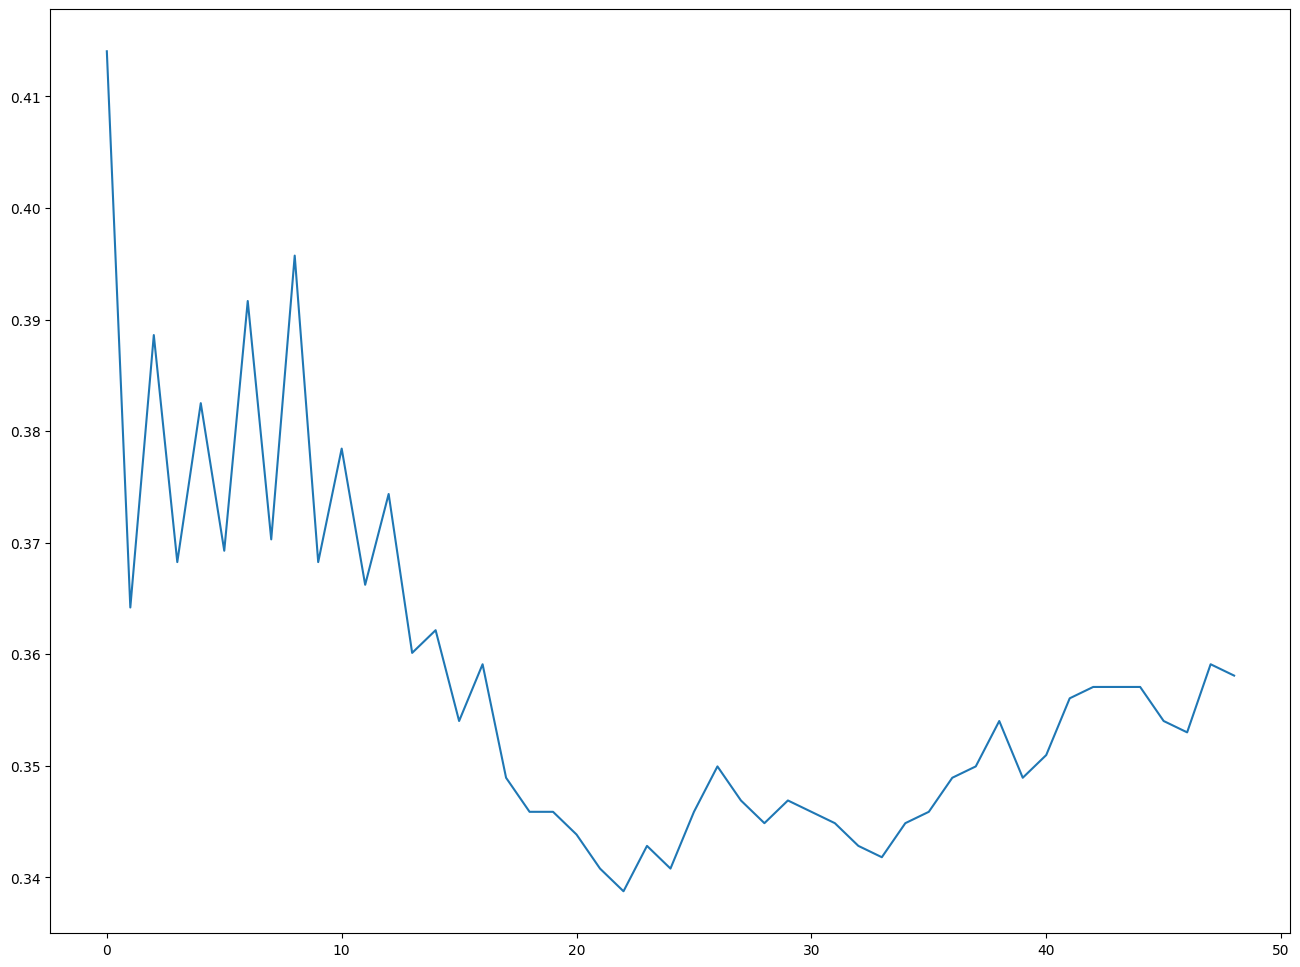

In [14]:
error_rates = []
for i in np.arange(1, 50):
    new_model = KNeighborsClassifier(n_neighbors =i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

plt.figure(figsize=(16,12))
plt.plot(error_rates)
plt.show()

In [15]:
print(model.score(X, y))
print(model.score(X_test, y_test))

0.6770451770451771
0.6408952187182095
